In [2]:
!pip install openai
import os
import openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 2.6 MB/s eta 0:00:00


# cookgpt

A simple demonstration to call chatgpt api endpoint.

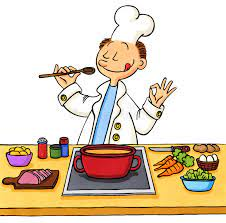

Before we get into the technical details, an API Key is needed to access GPT-3. This can be obtained by registering an account with OpenAI (for personal use). The API Key can then be viewed under the registered account.

# Creating a recipe based on ingredients

This can be done using the GPT-3 Completion endpoint which can be used for various applications such as Translation, Summarisation, Q & A, and etc. I’ll start by definining a general function which takes texts as input using the Python codes below. This function will be used by all three (3) example applications with different text input.

In [3]:
def GPT_Completion(texts):
    openai.api_key = "{OPENAI_KEY}"
    response = openai.Completion.create(
        engine="text-davinci-002",
        prompt = texts,
        temperature = 0.6,
        top_p = 1,
        max_tokens = 64,
        frequency_penalty = 0,
        presence_quality = 0
    )
    
    return print(response.choices[0].text)

You can see that there are a number of parameters under the Completion endpoint, namely:

engine is set to the “text-davinci-002”, which is the “most capable” GPT-3 model based on OpenAI’s documentation.

prompt is set to “text”, which is a variable representing the text input to the function.

temperature sets out how deterministic the output of the model is. A high temperature gives the model more freedom to sample outputs. For example, assuming the probability of returning word A and word B as the next word in a certain task is 80% and 20% respectively. Setting the a ‘low’ temperature (i.e. closer to 0) is likely to return word A on all instances the function is run, whereas setting a ‘high’ temperature (i.e. closer to 1) allows the model to return word B for some instances.

top_p sets out the distribution to select the outputs from. Using the same example above, a top_p of 0.75 tells the model to only select word A as it’s the only word with a probability exceeding 0.75.

max_tokens sets out the limit for the number of words to be returned. This may have financial implications as GPT-3 may charge per token for commercial applications. A general rule of thumb is the more words the model is allowed to return, the less ‘abstract’ the outputs will be.

frequency_penalty and presence_penalty both are parameters which penalise the model for returning outputs which appear often.


Finally, to ask GPT-3 to provide a cooking recipe given ingridents of Apple, Flour, Chicken and Salt, we run the Python codes below:

In [4]:
recipe = 'Provide a cooking recipe based on the following ingredients: \
\n \nApple \
\n \nFlour \
\n \nChicken \
\n \nSalt'
GPT_Completion(recipe)

RateLimitError: You exceeded your current quota, please check your plan and billing details.